<a href="https://colab.research.google.com/github/joohoshin/MLDL_Basic/blob/master/8_3_Regression2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multivariate Regression

In [ ]:
# 앞의 강의와 동일한 데이터
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                 'python-machine-learning-book-3rd-edition/'
                 'master/ch10/housing.data.txt', sep='\s+', header=None ) # \s+는 space 나 tab 이 섞여있을 때

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

# 1. CRIM      per capita crime rate by town
# 2. ZN        proportion of residential land zoned for lots over 
#                  25,000 sq.ft.
# 3. INDUS     proportion of non-retail business acres per town
# 4. CHAS      Charles River dummy variable (= 1 if tract bounds 
#                  river; 0 otherwise)
# 5. NOX       nitric oxides concentration (parts per 10 million)
# 6. RM        average number of rooms per dwelling
# 7. AGE       proportion of owner-occupied units built prior to 1940
# 8. DIS       weighted distances to five Boston employment centres
# 9. RAD       index of accessibility to radial highways
# 10. TAX      full-value property-tax rate per $10,000
# 11. PTRATIO  pupil-teacher ratio by town
# 12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
#                  by town
# 13. LSTAT    % lower status of the population
# 14. MEDV     Median value of owner-occupied homes in $1000s

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:

X = df[['RM', 'AGE', 'DIS']].values   # values를 사용하면 데이터프레임의 데이터만 가져온다 (인덱스명과 컬럼명 제외, 판다스 데이터 프레임은 데이터를 numpy array로 반환)
y = df.MEDV.values

In [ ]:
print(X.shape)
print(y.shape)

(506, 3)
(506,)


In [ ]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(X,y)
print(mlr.coef_)
print(mlr.intercept_)
print(mlr.score(X,y))


[ 8.4406291  -0.09941823 -0.48038409]
-21.87278779247286
0.5355978698785334


# 모델 성능 평가
테스트 셋을 통해 성능을 확인해봅시다

In [ ]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1].values
y = df.MEDV.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

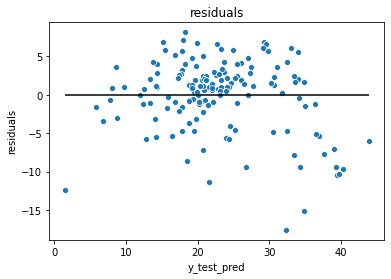

In [ ]:
# testset의 resudual을 구해봅시다
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(y_test_pred, y_test_pred-y_test)
plt.title('residuals') # 타이틀
plt.xlabel('y_test_pred') # y축 제목
plt.ylabel('residuals') # x축 제목
plt.hlines(y=0, xmin=y_test_pred.min(), xmax=y_test_pred.max())  # 수평선 그리기
plt.show()

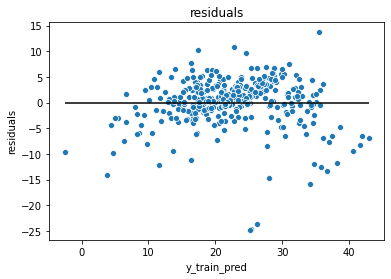

In [ ]:
# trainset의 resudual을 구해서 비교해봅시다
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(y_train_pred, y_train_pred-y_train)
plt.title('residuals') # 타이틀
plt.xlabel('y_train_pred') # y축 제목
plt.ylabel('residuals') # x축 제목
plt.hlines(y=0, xmin=y_train_pred.min(), xmax=y_train_pred.max())  # 수평선 그리기
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print('train MSE: {:.2f}, test MSE: {:.2f}'.format(mse_train, mse_test))

train MSE: 22.66, test MSE: 21.52


.format() 사용 관련 참고

https://pyformat.info/